In [1]:
import numpy as np

In [2]:
#PART 1
def v_dot_v(v1, v2):
    #v1 horizontal
    #v2 vertical
    assert len(v1) == len(v2)
    total = 0
    for i in range(len(v1)):
        total += v1[i] * v2[i]
    return total

a = np.array([100,10,1])
b = np.array([3,2,0])
v_dot_v(a, b) #should be 320

320

In [3]:
def m_dot_v(m, v):
    output = []
    for row in m:
        assert len(row) == len(v)
        output.append(v_dot_v(row, v))
    return np.array(output)

A = np.array([
    [1,0,3],
    [0,2,3],
])
x = np.array([1,10,100])
m_dot_v(A, x) #should be [301, 320]

array([301, 320])

In [4]:
def m_dot_m(m1, m2):
    output_cols = []
    for col in m2.T:
        output_cols.append(m_dot_v(m1, col))
    return np.array(output_cols).T

A = np.array([
    [1,0],
    [1,2],
    [1,3],
    [0,5],
    [100,200],
])
B = np.array([
    [1,0,10],
    [0,1,1],
])
m_dot_m(A, B)

array([[   1,    0,   10],
       [   1,    2,   12],
       [   1,    3,   13],
       [   0,    5,    5],
       [ 100,  200, 1200]])

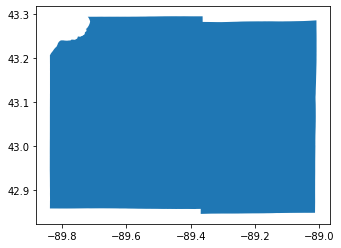

In [5]:
#PART 2
import rasterio
land = rasterio.open("zip://../p6/land.zip!wi.tif")

import geopandas as gpd
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Dane+County%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
dane = gpd.read_file(url)
dane.plot()

from rasterio.mask import mask
matrix, _ = mask(land, dane.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

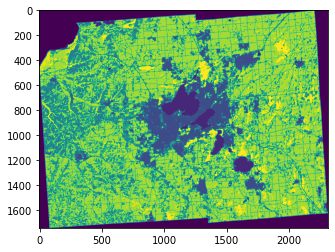

In [6]:
#visualize county
import matplotlib.pyplot as plt
plt.imshow(matrix)

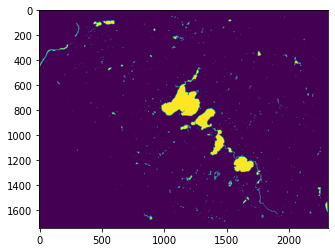

In [7]:
#highlighting water regions in Dane County
#lengend on https://www.mrlc.gov/data/legends/national-land-cover-database-2019-nlcd2019-legend
plt.imshow(matrix == 11)

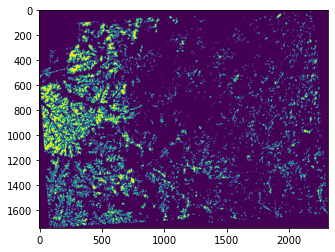

In [8]:
#deciduous forest
plt.imshow(matrix == 41)

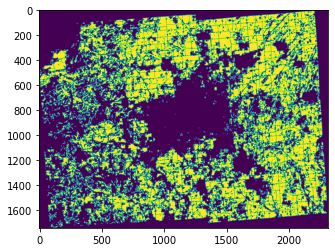

In [9]:
#cultivated crops
plt.imshow(matrix == 82)

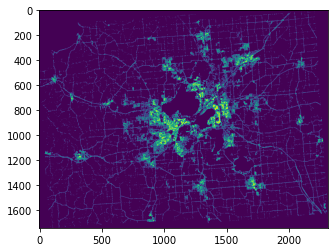

In [10]:
#developed, low intensity
plt.imshow(matrix == 22)

In [11]:
#PART 3
import numpy as np
a = np.array([
    [0,0,5,8],
    [1,2,4,8],
    [2,4,6,9],
])

In [16]:
print(a % 2)

print("\n True where number is even:")
print(a % 2 == 0)

[[0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]

 True where number is even:
[[ True  True False  True]
 [False  True  True  True]
 [ True  True  True False]]


In [18]:
print("True is 1, False is 0:")
print((a % 2 == 0).astype(int))
print((a % 2 == 0).astype(int).sum())

print("\n Total percent:")
print((a % 2 == 0).astype(int).mean() * 100)

True is 1, False is 0:
[[1 1 0 1]
 [0 1 1 1]
 [1 1 1 0]]
9

 Total percent:
75.0
